## сплайны
Вариант 14

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sum, power
from copy import deepcopy


In [2]:
from copy import deepcopy
def solve_matrix(a, b, c, d):
    can_solve = True
    n = len(b)

    c = np.append(c, 0).copy()
    b = b.copy()
    a = np.insert(a, 0, 0).copy()
    d = d.copy()
        
    for i in range(1, n-1):
        if abs(b[i]) < abs(a[i] + c[i-1]):
            f = False
            break
        if abs(c[i]/b[i]) > 1:
            f = False
            break
        if abs(a[i+1] / c[i]) > 1:
            f = False
            break
    if not can_solve:
        print('incorrect system')
        return None

    x = np.zeros(n)
    
    alpha =  np.zeros(n)
    beta = np.zeros(n)
    
    alpha[0] = -c[0] / b[0]
    beta[0] = d[0] / b[0]
    
    for i in range(1, n):
        alpha[i] = -c[i] / (a[i-1] * alpha[i-1] + b[i])
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / (a[i-1] * alpha[i-1] + b[i])
    
    x[n-1] = beta[n-1]
    
    for i in range(n-2, -1, -1):
        x[i] = alpha[i] * x[i+1] + beta[i]
    return x
        

In [3]:
def compute_sqrt_error(ys, pred_ys, normalize=False):
    e = sqrt(sum(power(ys-pred_ys, 2)))
    if normalize:
        return e / sqrt(len(ys))
    return e

In [4]:
xs = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ys = np.array([3.21, 2.95, 4.06, 4.03, 5.39, 5.97, 6.51, 6.77, 7.79])

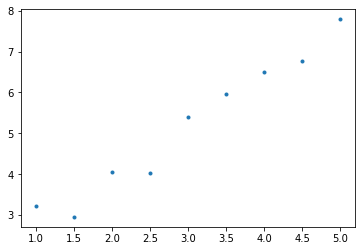

In [5]:
plt.plot(xs, ys, '.')

In [6]:
a = 1.4
b = 0.89
def f(x, a=a, b=b):
    return a*x+b

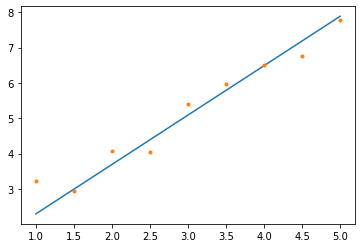

In [7]:
plt.plot(xs, f(xs))
plt.plot(xs, ys, '.')

In [8]:
from collections import namedtuple
Spline = namedtuple('Spline', 'a, b, c, d')
def calc_spline(xs, ys):
    n = len(xs)
    h = (xs[-1] - xs[0]) / (len(xs)-1)
    
    ak = np.ones(n-1)
    bk = np.ones(n) * 4
    ck = np.ones(n-1)
    dk = np.zeros(n)
    for i in range(1, n-1):
        dk[i] = (3 / (h*h)) * (ys[i+1] - 2*ys[i] + ys[i-1])
    
    c = solve_matrix(ak, bk, ck, dk)
    c[0] = 0
    c[n-1] = 0

    a = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n-2):
        a[i] = ys[i]
        b[i] = (ys[i+1] - ys[i]) / h - (h/3) * (c[i+1] + 2*c[i])
        d[i] = (c[i+1] - c[i]) / (3 * h)
     
    a[n-2] = ys[n-2]
    b[n-2] = ((ys[n-1] - ys[n-2]) / h) - ((2/3) * h * c[n-2])
    d[n-2] = -c[n-2]/(3*h)
    return Spline(a, b, c, d)

def spline_at(x, xs, spline):
    for i in range(len(xs)-1):
        if xs[i] <= x <= xs[i+1]:
            d = x - xs[i]
            return spline.a[i] + spline.b[i] * (x - xs[i]) + spline.c[i] * (x - xs[i])**2 + spline.d[i] * (x - xs[i])**3

In [9]:
spline = calc_spline(xs, ys)

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

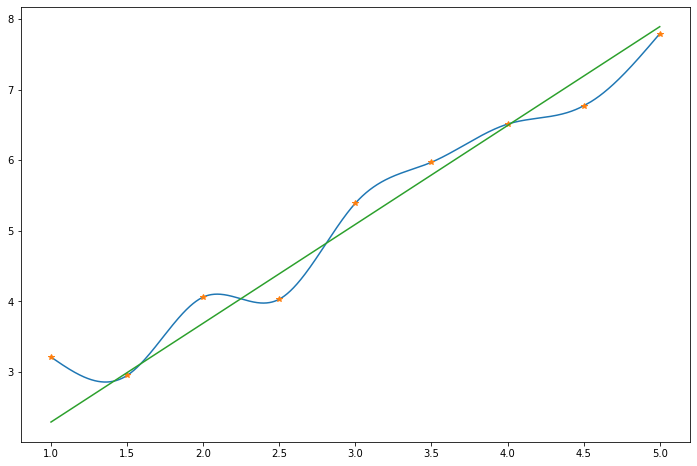

In [11]:
spline_xs = np.linspace(1, 5, 1000)
spline_ys = [spline_at(x, xs=xs, spline=spline) for x in spline_xs]
plt.plot(spline_xs, spline_ys)
plt.plot(xs, ys, '*')
# plt.plot(xs, ys)
plt.plot(xs, f(xs))

In [12]:
e = compute_sqrt_error(f(spline_xs), spline_ys)

In [13]:
e

9.036089246341936

In [14]:
e_norm = compute_sqrt_error(f(spline_xs), spline_ys, normalize=True)

In [15]:
e_norm

0.28574623158994833